### What Are Embeddings?
Think of embeddings as a way to translate words into a language that computers understand - numbers!

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

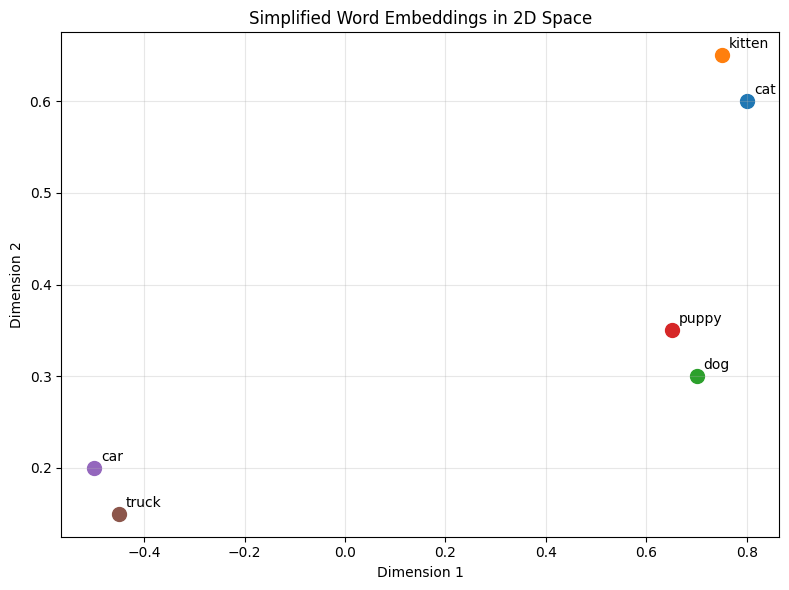

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Measuring Similarity

In [4]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)



In [5]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity=cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


In [6]:
cosine_similarity(cat_vector,car_vector)

np.float64(-0.43718588548916804)

### Creating Your First Embeddings

In [7]:
### Huggingface And OpenAI Models

from langchain_huggingface import HuggingFaceEmbeddings

## Initialize a simple Embedding model(no API Key needed!)
embeddings=HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings




/Users/kamalrajm/Library/CloudStorage/OneDrive-Personal/DataScience/93 GitHub/Code/Udemy-Langgraph-LangSmith/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [8]:
## create your first embeddings
text="Hello, I am learning about embeddings!"

embedding=embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length : {len(embedding)}")
print(embedding)


Text: Hello, I am learning about embeddings!
Embedding length : 384
[-0.018163282424211502, -0.09955167770385742, 0.013816109858453274, -0.008125923573970795, 0.014152180403470993, 0.0640648603439331, -0.006253357976675034, -0.0030178669840097427, 0.025287238880991936, -0.02019866183400154, 0.024329721927642822, 0.07435061782598495, 0.051177140325307846, 0.022038469091057777, -0.05830617994070053, 0.01526827272027731, 0.02358442358672619, 0.09455401450395584, -0.06508846580982208, 0.013296679593622684, -0.020497580990195274, -0.05690854787826538, 0.03030332177877426, -0.08365613967180252, 0.02659635618329048, -0.01523145753890276, -0.043615393340587616, 0.05398395657539368, 0.09025716781616211, -0.08893880248069763, 0.03964460641145706, -0.008835040964186192, -0.030343735590577126, 0.07425563037395477, -0.054099190980196, 0.11107998341321945, 0.03689985349774361, -0.008959794417023659, -0.06140244007110596, -0.0031433841213583946, 0.02195817418396473, 0.04220820590853691, -0.0289378836

In [9]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])
print(embedding_sentence[2])
print(embedding_sentence[3])
print(embedding_sentence[4])

[0.1304018646478653, -0.011870156973600388, -0.028117036446928978, 0.05123863369226456, -0.05597447603940964, 0.030191605910658836, 0.030161278322339058, 0.024698300287127495, -0.01837052032351494, 0.05876682326197624, -0.024953166022896767, 0.06015419587492943, 0.039831653237342834, 0.033230483531951904, -0.06131136417388916, -0.049373142421245575, -0.05486348271369934, -0.0400761216878891, 0.05642916262149811, 0.03915659710764885, -0.03473711386322975, -0.013247736729681492, 0.031966205686330795, -0.06349916756153107, -0.06017861142754555, 0.0782344788312912, -0.028303874656558037, -0.04744279757142067, 0.04035934433341026, -0.0066309524700045586, -0.06674094498157501, -0.004191387910395861, -0.025311702862381935, 0.053341664373874664, 0.01742810569703579, -0.09792358428239822, 0.006061320658773184, -0.06524164229631424, 0.045572567731142044, 0.023641804233193398, 0.07658480852842331, -0.010264351963996887, -0.0040767602622509, -0.06232275813817978, 0.03370519354939461, 0.01866116374

In [10]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications

